In [ ]:
# Imporing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Importing datasets

df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#data set with only pixels
df_pixels = df.drop(['label'], axis=1)
df_pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Digit labels
df_label = df['label']
df_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [ ]:
# split the dataset into training set and testing set


df_train, df_test = train_test_split(
    df, train_size=0.80, stratify=df["label"],
)

df_train.info()
df_test.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33600 entries, 36733 to 14192
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 201.5 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 12083 to 14890
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 50.4 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36733,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21148,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20872,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40040,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# cross validation
# Test_score is the validation scores
np.random.seed(324)

# Randomly split digit_train into a subtrain (75%) and a validation set (25%)
df_subtrain, df_validation = train_test_split(
     df_train, test_size = 0.20, random_state=324
)

X = df_subtrain.drop(['label'], axis=1)
y = df_subtrain["label"]

# Use 5 folds for cross validation
cv_5 = cross_validate(
    estimator = KNeighborsClassifier(),
    X=X,
    y=y,
    cv=5,
    return_train_score=True,
)

# Display the matrics for cross validation
cv_5_df = pd.DataFrame(cv_5)
cv_5

{'fit_time': array([0.12597442, 0.07810664, 0.06755185, 0.06247067, 0.06246543]),
 'score_time': array([4.10194969, 3.5130527 , 4.090868  , 3.47460842, 3.74926043]),
 'test_score': array([0.96130952, 0.95963542, 0.96056548, 0.95665923, 0.95851935]),
 'train_score': array([0.97195871, 0.97353981, 0.9734003 , 0.97358631, 0.97358631])}

In [ ]:
# Find the mean and standard error
cv_5_metrics = cv_5_df.aggregate(func=['mean','std'])
cv_5_metrics

,fit_time,score_time,test_score,train_score
mean,0.079314,3.785948,0.959338,0.973214
std,0.026854,0.302317,0.001825,0.000706


In [ ]:
# Try 10, 30, 50, 70 neighbors

np.random.seed(324)

param_grid = {
     'n_neighbors': [5,10,15],
}

# Create a tune model

digit_tune_grid = GridSearchCV(
    KNeighborsClassifier(),
    
    param_grid,
    cv=2,
    verbose = 3, 
    n_jobs = -1)

In [ ]:
# Fit the model to the training data

digit_model_grid = digit_tune_grid.fit(X, y)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


C:\Users\manya\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


In [ ]:
accuracies_grid = pd.DataFrame(digit_model_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.155436,0.004655,15.328826,3.993552,5,{'n_neighbors': 5},NaN,0.951935,NaN,NaN,1
1,0.162281,0.010616,9.991740,9.808507,10,{'n_neighbors': 10},0.947321,NaN,NaN,NaN,2
2,0.158598,0.007818,16.290612,3.750110,15,{'n_neighbors': 15},NaN,0.941146,NaN,NaN,3


In [ ]:
# The best value for k is 5
# Model specification for K-nearest neighbors classification

knn_spec = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Show only the pixels of training set
df_train_pixels = df_train.drop(['label'], axis=1)
df_train_pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36733,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Show only the labels of training set
df_train_label = df_train['label']
df_train_label.head()

36733    5
21148    9
20872    8
9326     7
40040    4
Name: label, dtype: int64

In [ ]:
# Train the model on digit_train
knn_fit = knn_spec.fit(X=df_train_pixels, y=df_train_label);

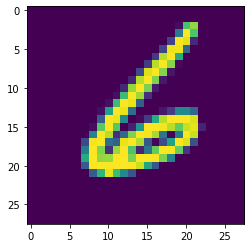

In [ ]:
# Display the image of test digit in testing set
df_test_pixels = df_test.drop(['label'], axis=1)
test_row = df_test_pixels.iloc[2].values
test_matrix = test_row.reshape((28, 28))
test_image = plt.imshow(test_matrix)

In [ ]:
# Predict the test digit in test set
new_obs = df_test_pixels.head(3)
prediction = knn_fit.predict(new_obs)
prediction[2]

6

In [ ]:
# Prediction for testing set
test_predictions = knn_fit.predict(df_test_pixels)

# Add the predictions to testing set
test_predictions = pd.concat(
    [
        pd.DataFrame(test_predictions, columns=["predicted"]),
        df_test.reset_index(drop=True),
    ],
    axis=1,
)  

In [ ]:
# Display the confusion matrix for presictions

confusion = confusion_matrix(
    test_predictions["label"],
    test_predictions["predicted"],
    labels=knn_fit.classes_,
)

confusion

array([[823,   0,   1,   0,   0,   1,   2,   0,   0,   0],
       [  0, 932,   3,   0,   0,   0,   1,   1,   0,   0],
       [  3,   9, 803,   2,   1,   1,   1,  13,   0,   2],
       [  2,   1,   6, 837,   0,   9,   0,   8,   2,   5],
       [  1,   9,   0,   0, 788,   0,   1,   2,   1,  12],
       [  2,   1,   1,  13,   1, 727,  11,   1,   0,   2],
       [  4,   0,   0,   0,   0,   7, 816,   0,   0,   0],
       [  0,  10,   1,   0,   1,   0,   0, 855,   0,  13],
       [  3,   5,   4,  15,   6,  17,   5,   2, 747,   9],
       [  4,   2,   1,   6,  10,   1,   1,  14,   2, 797]], dtype=int64)

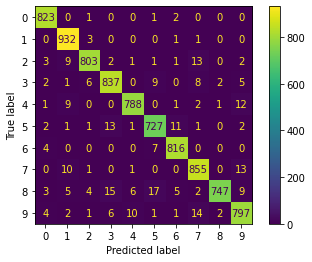

In [ ]:
confusion_display = ConfusionMatrixDisplay(
    confusion_matrix=confusion, display_labels=knn_fit.classes_
)

confusion_display.plot();

In [ ]:
# Compute the accuracy of the classifier
accuracy = knn_fit.score(df_test_pixels, df_test['label'])
accuracy

0.9672619047619048